In [1]:
# import lib
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Get the stock quote
df = web.DataReader('INTC', data_source='yahoo', start='2012-01-01',end='2020-01-01')
df.reset_index(drop=True, inplace=True)
df

,High,Low,Open,Close,Volume,Adj Close
0,24.889999,24.389999,24.620001,24.540001,44845600.0,18.896772
1,25.129999,24.530001,24.570000,25.110001,47504000.0,19.335699
2,25.450001,24.980000,25.059999,25.400000,49490600.0,19.559006
3,25.400000,25.010000,25.209999,25.250000,36343500.0,19.443497
4,25.559999,25.219999,25.400000,25.469999,47478600.0,19.612911
...,...,...,...,...,...,...
2007,59.480000,59.160000,59.250000,59.410000,6313200.0,58.390232
2008,59.849998,59.349998,59.410000,59.820000,11480300.0,58.793194
2009,60.480000,59.900002,59.910000,60.080002,14085800.0,59.048733
2010,60.049999,59.380001,59.990002,59.619999,12750500.0,58.596626


In [3]:
#get the data of the row and columns in the data set
df.shape

(2012, 6)

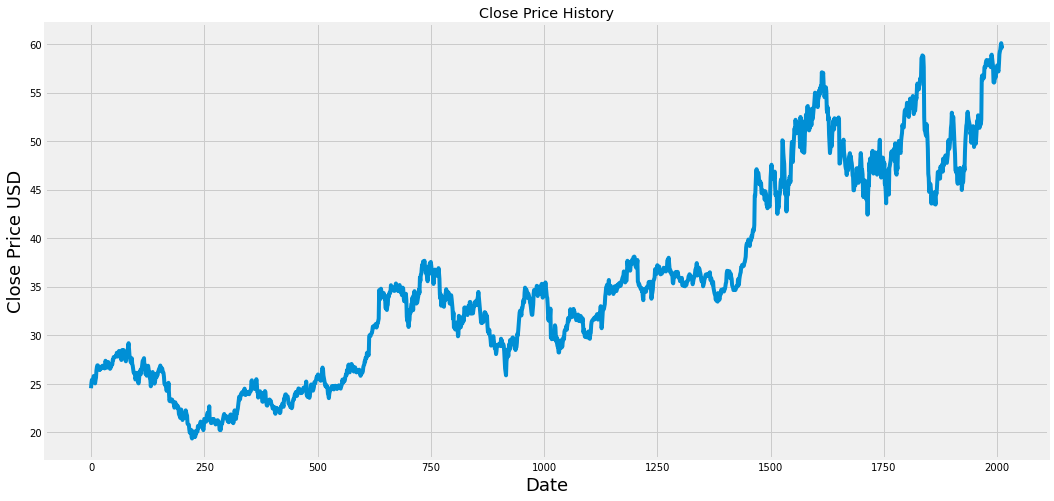

In [4]:
#plotting the Closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()

In [5]:
#create dataframe only with "Close" column
data = df.filter(['Close'])
#convert data to the numpy
dataset = data.values
#Get the number of rows to train the model 0.8
training_data_len = math.ceil(len (dataset) * .8)
training_data_len

1610

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.12721022],
       [0.14120825],
       [0.14833003],
       ...,
       [1.        ],
       [0.98870327],
       [0.99435159]])

In [19]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.12721022, 0.14120825, 0.14833003, 0.14464635, 0.15004908,
       0.15299605, 0.1581532 , 0.15692532, 0.14194496, 0.1394892 ,
       0.14808444, 0.15397835, 0.17239682, 0.18050094, 0.18516696,
       0.18516696, 0.18148328, 0.18099211, 0.18123769, 0.17337916,
       0.17657167, 0.17509821, 0.18123769, 0.18074652, 0.17878189,
       0.18393909, 0.18418467, 0.1802554 , 0.1802554 , 0.18222004,
       0.17730843, 0.18344791, 0.19670923, 0.19155204, 0.18099211,
       0.17927306, 0.1802554 , 0.18492138, 0.19351667, 0.18467579,
       0.18418467, 0.18565813, 0.17632613, 0.17804518, 0.18541255,
       0.1836935 , 0.18934182, 0.18737718, 0.19965616, 0.19891941,
       0.20604124, 0.20555007, 0.20579565, 0.20604124, 0.20677799,
       0.20972492, 0.20923375, 0.21684675, 0.21684675, 0.20726912])]
[0.21610999443159135]

[array([0.12721022, 0.14120825, 0.14833003, 0.14464635, 0.15004908,
       0.15299605, 0.1581532 , 0.15692532, 0.14194496, 0.1394892 ,
       0.14808444, 0.15397835, 0.17

In [20]:
#Convering to nupmy arrays
x_train, y_train  = np.array(x_train), np.array(y_train)


In [21]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1550, 60, 1)

In [22]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [23]:
#Compile the model
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [24]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1550/1550 [==============================] - 34s 22ms/step - loss: 0.0017


In [25]:
#Creating the training data set
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [26]:
#Convert data to numpy array
x_test = np.array(x_test)
x_test

array([[0.72740663, 0.74631627, 0.76989188, ..., 0.88040269, 0.86910605,
        0.88605101],
       [0.74631627, 0.76989188, 0.78487225, ..., 0.86910605, 0.88605101,
        0.88310408],
       [0.76989188, 0.78487225, 0.77062869, ..., 0.88605101, 0.88310408,
        0.89194496],
       ...,
       [0.73747539, 0.75319247, 0.77504903, ..., 0.97912568, 0.98354612,
        0.99361488],
       [0.75319247, 0.77504903, 0.76768166, ..., 0.98354612, 0.99361488,
        1.        ],
       [0.77504903, 0.76768166, 0.7458251 , ..., 0.99361488, 1.        ,
        0.98870327]])

In [27]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
x_test

array([[[0.72740663],
        [0.74631627],
        [0.76989188],
        ...,
        [0.88040269],
        [0.86910605],
        [0.88605101]],

       [[0.74631627],
        [0.76989188],
        [0.78487225],
        ...,
        [0.86910605],
        [0.88605101],
        [0.88310408]],

       [[0.76989188],
        [0.78487225],
        [0.77062869],
        ...,
        [0.88605101],
        [0.88310408],
        [0.89194496]],

       ...,

       [[0.73747539],
        [0.75319247],
        [0.77504903],
        ...,
        [0.97912568],
        [0.98354612],
        [0.99361488]],

       [[0.75319247],
        [0.77504903],
        [0.76768166],
        ...,
        [0.98354612],
        [0.99361488],
        [1.        ]],

       [[0.77504903],
        [0.76768166],
        [0.7458251 ],
        ...,
        [0.99361488],
        [1.        ],
        [0.98870327]]])

In [28]:
#Get the model pridicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions.shape

(402, 1)

In [29]:
#Get the RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

3.2452219075767994

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


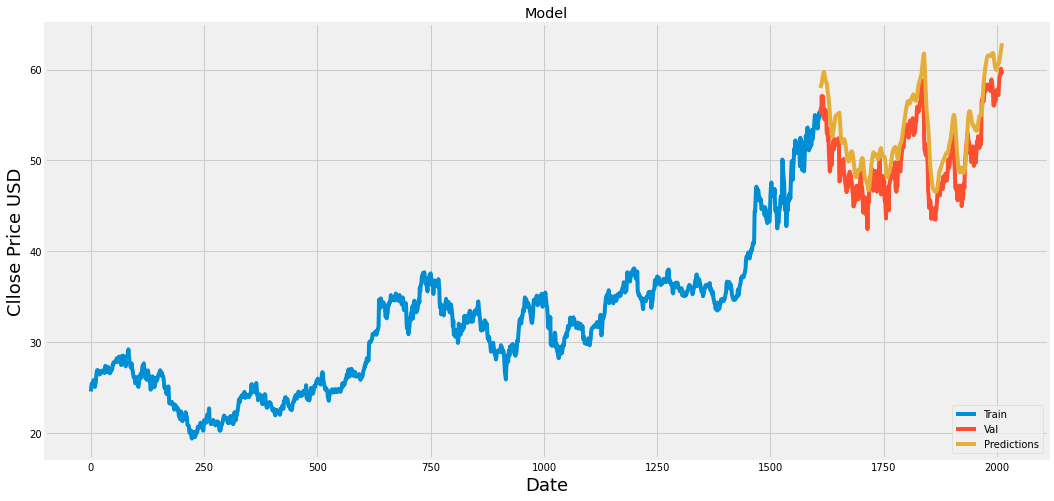

In [30]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)

plt.ylabel('Cllose Price USD', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [31]:
valid

,Close,Predictions
1610,55.320000,57.968750
1611,55.680000,58.133560
1612,55.200001,58.331703
1613,57.080002,58.443062
1614,56.830002,58.790085
...,...,...
2007,59.410000,61.493069
2008,59.820000,61.865955
2009,60.080002,62.258572
2010,59.619999,62.643353


In [32]:
df

,High,Low,Open,Close,Volume,Adj Close
0,24.889999,24.389999,24.620001,24.540001,44845600.0,18.896772
1,25.129999,24.530001,24.570000,25.110001,47504000.0,19.335699
2,25.450001,24.980000,25.059999,25.400000,49490600.0,19.559006
3,25.400000,25.010000,25.209999,25.250000,36343500.0,19.443497
4,25.559999,25.219999,25.400000,25.469999,47478600.0,19.612911
...,...,...,...,...,...,...
2007,59.480000,59.160000,59.250000,59.410000,6313200.0,58.390232
2008,59.849998,59.349998,59.410000,59.820000,11480300.0,58.793194
2009,60.480000,59.900002,59.910000,60.080002,14085800.0,59.048733
2010,60.049999,59.380001,59.990002,59.619999,12750500.0,58.596626


In [33]:
#Get the quote
intc_quote = web.DataReader('INTC', data_source='yahoo', start='2018-11-01',end='2020-05-12')
#Create a new dataframe
new_df = intc_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print('%s and %s' %(pred_price, new_df))

[[62.684376]] and                 Close
Date                 
2018-11-01  48.220001
2018-11-02  47.110001
2018-11-05  47.970001
2018-11-06  47.250000
2018-11-07  48.720001
...               ...
2020-05-06  59.180000
2020-05-07  59.169998
2020-05-08  59.669998
2020-05-11  60.130001
2020-05-12  58.389999

[383 rows x 1 columns]


In [34]:
#Get the quote
intc_quote2 = web.DataReader('INTC', data_source='yahoo', start='2020-05-12',end='2020-05-12')
print(intc_quote2['Close'])

Date
2020-05-12    58.389999
Name: Close, dtype: float64
